# Hypothesis Testing with Insurance Data (Core)

## Assignment
- We will be working with the US Health Insurance Dataset from Kaggle.

- We have been asked to use our hypothesis testing skills to answer the following questions:

    - Q1. Do smokers have higher insurance charges than non-smokers?
    - Q2. Are men more likely to smoke than women?
    - Q3. Do different regions have different charges, on average?

### Tasks: 
- For each question, make sure to:

    - State your Null Hypothesis and Alternative Hypothesis
    - Select the correct test according to the data type and number of samples
    - Test the assumptions of your selected test.
    - Execute the selected test, or the alternative test (if you do not meet the assumptions)
    - Interpret your p-value and reject or fail to reject your null hypothesis 
    - Show a supporting visualization that helps display the result

## Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1.
- Do smokers have higher insurance charges than non-smokers?


1. - Hypothesis
    - **Null**: Smokers and Non-smokers insurance charges are not significantly different. 
    - **Alternative**: Smokers insurance charges are significantly different than non smokers charges. 

2. We will use a **2 Sample T-Test**. 
- Numeric Data
- Two groups/samples

### Visualize and Separate Data for Hypothesis

In [5]:
# check the col that contains the measurement
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [7]:
# check the col that contains info on gender
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [9]:
# create a column that easily separates our groups
df['non_smoker'] = df['smoker'].str.contains('no')
df['non_smoker'].value_counts()

True     1064
False     274
Name: non_smoker, dtype: int64

In [10]:
# save list of columns needed for each group
needed_cols = ['non_smoker','charges']

df[needed_cols]


,non_smoker,charges
0,False,16884.92400
1,True,1725.55230
2,True,4449.46200
3,True,21984.47061
4,True,3866.85520
...,...,...
1333,True,10600.54830
1334,True,2205.98080
1335,True,1629.83350
1336,True,2007.94500


In [11]:
# save smokers in separate variable
smokers_df = df.loc[ df['non_smoker']==False, needed_cols]
smokers_df

,non_smoker,charges
0,False,16884.92400
11,False,27808.72510
14,False,39611.75770
19,False,36837.46700
23,False,37701.87680
...,...,...
1313,False,36397.57600
1314,False,18765.87545
1321,False,28101.33305
1323,False,43896.37630


In [13]:
nonsmokers_df = df.loc[ df['non_smoker']==True, needed_cols]
nonsmokers_df

,non_smoker,charges
1,True,1725.55230
2,True,4449.46200
3,True,21984.47061
4,True,3866.85520
5,True,3756.62160
...,...,...
1332,True,11411.68500
1333,True,10600.54830
1334,True,2205.98080
1335,True,1629.83350


In [14]:
# Make a df just for visualization by concat the groups 
plot_df = pd.concat([smokers_df,nonsmokers_df])
plot_df

,non_smoker,charges
0,False,16884.9240
11,False,27808.7251
14,False,39611.7577
19,False,36837.4670
23,False,37701.8768
...,...,...
1332,True,11411.6850
1333,True,10600.5483
1334,True,2205.9808
1335,True,1629.8335


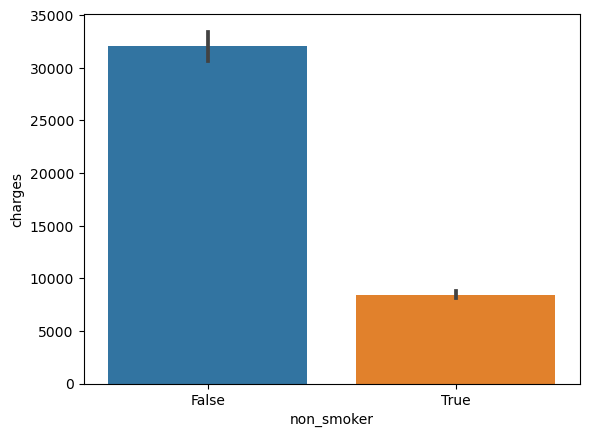

In [16]:
# visualize the group means
sns.barplot(data=plot_df, x='non_smoker',y='charges');

3. Testing Assumptions:

Significant outliers

Normality

Equal Variance

In [17]:
# Saving just the numeric col as final group variables
smoker_group= smokers_df['charges']
nonsmoker_group= nonsmokers_df['charges']


In [18]:
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [19]:
# Check smokers group for outliers
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

In [20]:
# Check non smokers group for outliers
nonsmoker_outliers = np.abs(stats.zscore(nonsmoker_group)) > 3
nonsmoker_outliers.sum()

24

In [21]:
# remove outliers from non smoker group
nonsmoker_group = nonsmoker_group.loc[~nonsmoker_outliers]
nonsmoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [22]:
# Check smoker group for normality
result = stats.normaltest(smoker_group)
result.pvalue

5.564930630036463e-14

In [23]:
# Check n for female group
len(smoker_group)

274

In [24]:
# Check nonsmoker group for normality
result = stats.normaltest(nonsmoker_group)
result.pvalue

2.6945416315543976e-36

In [25]:
# Check n for male group
len(nonsmoker_group)

1040

Test for Equal Variances

In [26]:
# Use Levene's test for equal variance
result = stats.levene(smoker_group, nonsmoker_group)
print(result)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


In [27]:
# Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [28]:
result= stats.ttest_ind(smoker_group, nonsmoker_group, equal_var= False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

- Our p-value is < alpha, so we reject the null hypothesis. We will accept that there is a significant difference charges for people who smoker vs non smokers. 

## Q2.
- Are men more likely to smoke than women?

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges,non_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


1. Hypothesis:
- **Null:** There is no significant difference that males are more likely to smoke over women.
- **Alternate:** There is a significant difference in which males are more likely to smoke over women.

-We will use a **Chi-Squared**.

    - Categorical Data

    - Two groups/samples

### Visualize

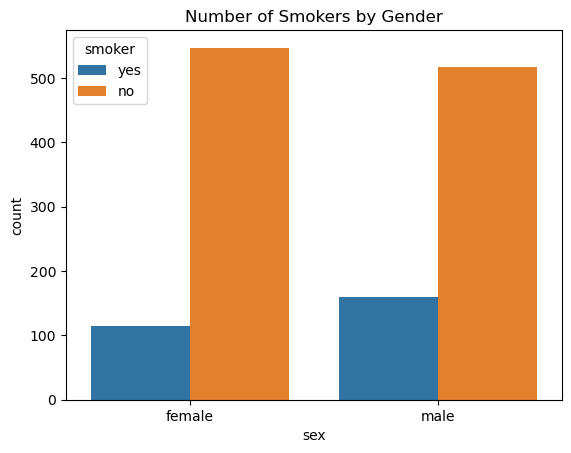

In [30]:
ax = sns.countplot(data=df, x='sex', hue='smoker')
ax.set_title('Number of Smokers by Gender');

In [31]:
table= pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [32]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

In [33]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

- Since our p < .05, we reject the null hypothesis that there is no relationship between a persons sex and if they smoke.
- This means that we accept the alternate hypothesis and conclude that there is a relationship between a individuals sex and likeness to smoke.

## Q3. 
- Do different regions have different charges, on average?

- Hypothesis
    - **Null:** There is no significant difference between regions and their charges.
    - **Alternate:** There is a significant difference between regions and their charges. 

Visualize

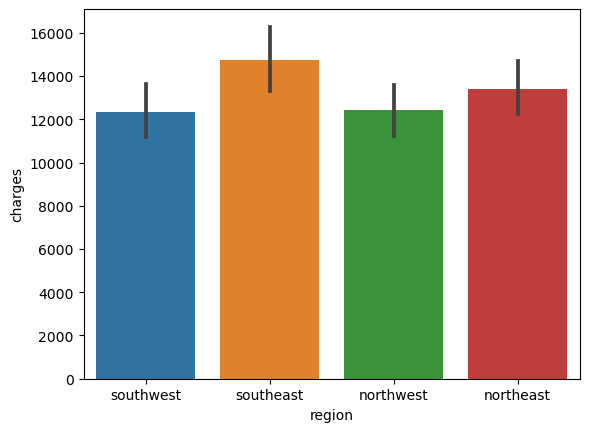

In [35]:
sns.barplot(data=df, x='region', y='charges');

In [37]:
# Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
# Loop through all unique categories
for i in df['region'].unique():
    # Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [38]:
# Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    # save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
# convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [39]:
# checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [40]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [41]:

result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [43]:
values = df['charges']
labels = df['region']

tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


- For the most part, there is no significant difference on charges based on the region. The only region with a signifant difference is between the southwest and southeast region. 